In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_dataset = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="outer")

# Display the data table for preview
merged_dataset.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merged_copy = merged_dataset.copy()
merged_subset = merged_copy.loc[:, ["Drug","Timepoint","Tumor Volume (mm3)"]]
grouped_subset = merged_subset.groupby(["Drug","Timepoint"],as_index=False)
subset_mean = grouped_subset["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_df= pd.DataFrame(subset_mean)

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
merged_copy2 = merged_dataset.copy()
merged_subset2 = merged_copy2.loc[:, ["Drug","Timepoint","Tumor Volume (mm3)"]]
grouped_subset2 = merged_subset2.groupby(["Drug","Timepoint"])
subset_stderr = grouped_subset2["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
stderr_df = pd.DataFrame(subset_stderr)
stderr_df.reset_index(inplace=True, drop=False)

# Preview DataFrame
stderr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
minor_dataset = merged_subset.groupby(["Drug","Timepoint"])
minor_dataset_mean = minor_dataset["Tumor Volume (mm3)"].mean()
minor_df= pd.DataFrame(minor_dataset_mean)
minor_df1=minor_df.unstack(0)
reformatted_minor = minor_df1["Tumor Volume (mm3)"]

# Preview that Reformatting worked
reformatted_minor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


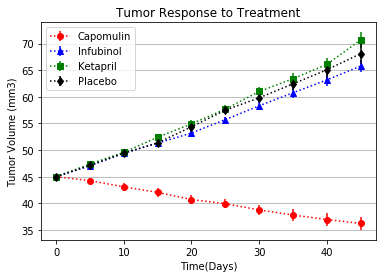

In [5]:
# Generate the Plot (with Error Bars)
x_axis = []
standard_error = stderr_df.iloc[0:10,2]
standard_error2 = stderr_df.iloc[20:30,2]
standard_error3 = stderr_df.iloc[30:40,2]
standard_error4 = stderr_df.iloc[60:70,2]
x_axis = list(reformatted_minor.index)
y_axis = reformatted_minor.loc[:,"Capomulin"]
y_axis2 = reformatted_minor.loc[:,"Infubinol"]
y_axis3 = reformatted_minor.loc[:,"Ketapril"]
y_axis4 = reformatted_minor.loc[:,"Placebo"]

plt.errorbar(x_axis,y_axis, standard_error, fmt="o",linestyle='dotted',color='red',label="Capomulin")
plt.errorbar(x_axis,y_axis2, standard_error2, fmt="^",linestyle='dotted',color='blue',label="Infubinol")
plt.errorbar(x_axis,y_axis3, standard_error3, fmt="s",linestyle='dotted',color='green',label="Ketapril")
plt.errorbar(x_axis,y_axis4, standard_error4, fmt="d",linestyle='dotted',color='black',label="Placebo")

# Add labels to the x and y axes
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')
plt.legend(loc='best')

# Show and save the Figure
plt.savefig("Images/tumor-response.png")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_site = merged_dataset.copy()
metastatic_site_subset = metastatic_site.loc[:, ["Drug","Timepoint","Metastatic Sites"]]
metastatic_site_grouped = metastatic_site_subset.groupby(["Drug","Timepoint"])
metastatic_site_mean = metastatic_site_grouped["Metastatic Sites"].mean()

# Convert to DataFrame
metastatic_site= pd.DataFrame(metastatic_site_mean)

# Preview DataFrame
metastatic_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_site2 = merged_dataset.copy()
metastatic_site_subset2 = metastatic_site2.loc[:, ["Drug","Timepoint","Metastatic Sites"]]
metastatic_site_grouped2 = metastatic_site_subset2.groupby(["Drug","Timepoint"])
metastatic_site_stderr = metastatic_site_grouped2["Metastatic Sites"].sem()

# Convert to DataFrame
metastatic_site_stderr_df = pd.DataFrame(metastatic_site_stderr)

# Preview DataFrame
metastatic_site_stderr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_unstacked=metastatic_site.unstack(0)
metastatic_reformatted = metastatic_unstacked["Metastatic Sites"]

# Preview that Reformatting worked
metastatic_reformatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


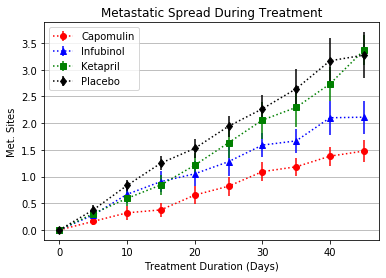

In [9]:
# Generate the Plot (with Error Bars)
x_axis = []
x_axis = list(metastatic_reformatted.index)
standard_error = metastatic_site_stderr_df.iloc[0:10,0]
standard_error2 = metastatic_site_stderr_df.iloc[20:30,0]
standard_error3 = metastatic_site_stderr_df.iloc[30:40,0]
standard_error4 = metastatic_site_stderr_df.iloc[60:70,0]
y_axis = metastatic_reformatted.loc[:,"Capomulin"]
y_axis2 = metastatic_reformatted.loc[:,"Infubinol"]
y_axis3 = metastatic_reformatted.loc[:,"Ketapril"]
y_axis4 = metastatic_reformatted.loc[:,"Placebo"]

plt.errorbar(x_axis,y_axis, standard_error, fmt="o",linestyle='dotted',color='red',label="Capomulin")
plt.errorbar(x_axis,y_axis2, standard_error2, fmt="^",linestyle='dotted',color='blue',label="Infubinol")
plt.errorbar(x_axis,y_axis3, standard_error3, fmt="s",linestyle='dotted',color='green',label="Ketapril")
plt.errorbar(x_axis,y_axis4, standard_error4, fmt="d",linestyle='dotted',color='black',label="Placebo")

# Add labels to the x and y axes
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(axis='y')
plt.legend(loc='best')

# Save the Figure
plt.savefig("Images/metastatic-response.png")

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_copy = merged_dataset.copy()
mouse_count_subset = mouse_count_copy.loc[:, ["Drug","Timepoint","Mouse ID"]]
mouse_count_grouped = mouse_count_subset.groupby(["Drug","Timepoint"],as_index=False)
mouse_count = mouse_count_grouped["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df= pd.DataFrame(mouse_count)
mouse_count_renamed=mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouse_count_renamed.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
survival_dataset = mouse_count_subset.groupby(["Drug","Timepoint"])
survival_dataset_count = survival_dataset["Mouse ID"].count()
survival_df= pd.DataFrame(survival_dataset_count)
survival_df_renamed=survival_df.rename(columns={"Mouse ID":"Mouse Count"})
survival_unstacked=survival_df_renamed.unstack(0)
survival_rates = survival_unstacked["Mouse Count"]

# Preview the Data Frame
survival_rates.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


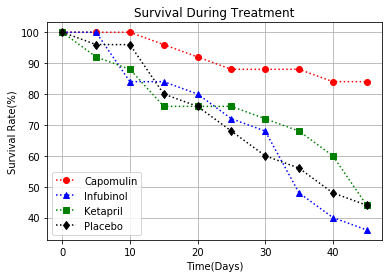

In [12]:
# Generate the Plot (Accounting for percentages)
x_axis = []
x_axis = list(survival_rates.index)
y_axis = []
y_axis2 = []
y_axis3 = []
y_axis4 = []
y_axis = (survival_rates.loc[:,"Capomulin"])/25*100
y_axis2 = (survival_rates.loc[:,"Infubinol"])/25*100
y_axis3 = (survival_rates.loc[:,"Ketapril"])/25*100
y_axis4 = (survival_rates.loc[:,"Placebo"])/25*100

plt.plot(x_axis,y_axis, marker="o",linestyle='dotted',color='red',label="Capomulin")
plt.plot(x_axis,y_axis2, marker="^",linestyle='dotted',color='blue',label="Infubinol")
plt.plot(x_axis,y_axis3, marker="s",linestyle='dotted',color='green',label="Ketapril")
plt.plot(x_axis,y_axis4, marker="d",linestyle='dotted',color='black',label="Placebo")
                               
# Add labels to the x and y axes
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.grid(axis='both')
plt.legend(loc="best")

# Save the Figure
plt.savefig("Images/survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
df_length = len(reformatted_minor)
percent_changes = []
for i in range(df_length):
    reading1 = reformatted_minor.iloc[0,i]
    reading2 = reformatted_minor.iloc[df_length-1,i]
    drug_change = (reading2-reading1)/reading1*100
    percent_changes.append(drug_change)

In [14]:
# Display the data to confirm
percent_changes_dict={}
drug_labels = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
for i in range(len(percent_changes)):
    percent_changes_dict[drug_labels[i]]=round(percent_changes[i],6)
    
percent_changes_dict  

{'Capomulin': -19.475303,
 'Ceftamin': 42.516492,
 'Infubinol': 46.123472,
 'Ketapril': 57.028795,
 'Naftisol': 53.923347,
 'Placebo': 51.29796,
 'Propriva': 47.241175,
 'Ramicane': -22.3209,
 'Stelasyn': 52.085134,
 'Zoniferol': 46.579751}

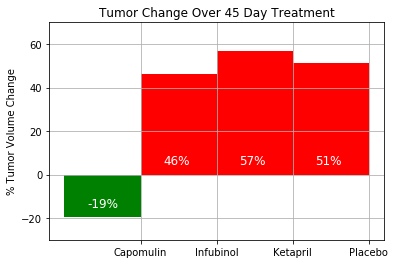

In [15]:
# Store all Relevant Percent Changes into a Tuple
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
values=[]
for k, v in percent_changes_dict.items():
    if k in drugs:
        values.append(v)
        
# Splice the data between passing and failing drugs
Pass=[x for x in values if x<0]
Fail=[x for x in values if x>=0]

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
x_axis = np.arange(0, len(values))

ax.bar(x_axis[0], Pass, color='green', width=-1.0, align='edge')
ax.bar(x_axis[1:4], Fail, color='red', width=-1.0, align='edge')

ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.grid(axis="both")
ax.set_ylim(-30, 70)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels(drugs)
ax.set_yticks([-20, 0, 20, 40, 60])

# Use functions to label the percentages of changes
# Call functions to implement the function calls
x = 0.3
y = 5
ax.text(-1+x, -20+y, (f'{int(Pass[0])}%'), fontsize=12, color='white')
ax.text(0+x, 0+y, (f'{int(Fail[0])}%'), fontsize=12, color='white')
ax.text(1+x, 0+y, (f'{int(Fail[1])}%'), fontsize=12, color='white')
ax.text(2+x, 0+y, (f'{int(Fail[2])}%'), fontsize=12, color='white')

# Save the Figure
fig.savefig("Images/tumor-change.png")

# Show the Figure
fig.show()